In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

plt.style.use('fivethirtyeight')

(array([   3.,   43.,  250.,  899., 1851., 2395., 1646.,  730.,  155.,
          28.]),
 array([-43.07961407, -27.64709019, -12.21456631,   3.21795757,
         18.65048145,  34.08300533,  49.51552921,  64.94805308,
         80.38057696,  95.81310084, 111.24562472]),
 <BarContainer object of 10 artists>)

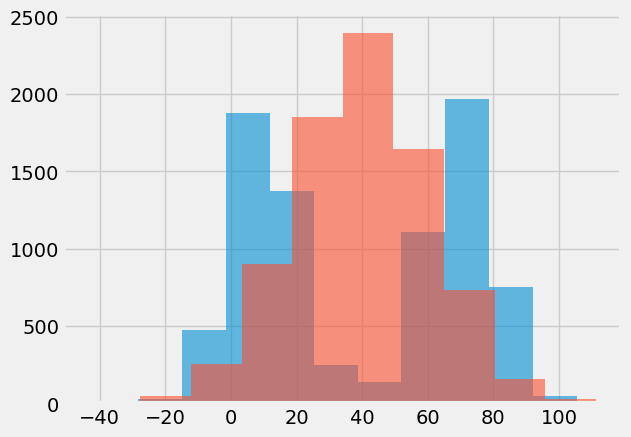

In [18]:
N=4000
mu, sigma = 70, 10
mu2, sigma2 = 10, 10
mu3, sigma3 = 40, 20
X1 = np.random.normal(mu, sigma, N)
Xa = np.random.normal(mu, sigma, N)
X2 = np.random.normal(mu2, sigma2, N)
X3 = np.random.normal(mu, sigma, 2*N)
X_bimodal = np.concatenate([X1, X2])
X_norm = np.random.normal(mu3, sigma3, 2*N)
plt.hist(X_bimodal, alpha=0.6)
plt.hist(X_norm, alpha=0.6)

In [4]:
def observed_y(x):
    return np.array([1.2 * i + 0 + np.random.normal(-1,1)*8 for i in x])

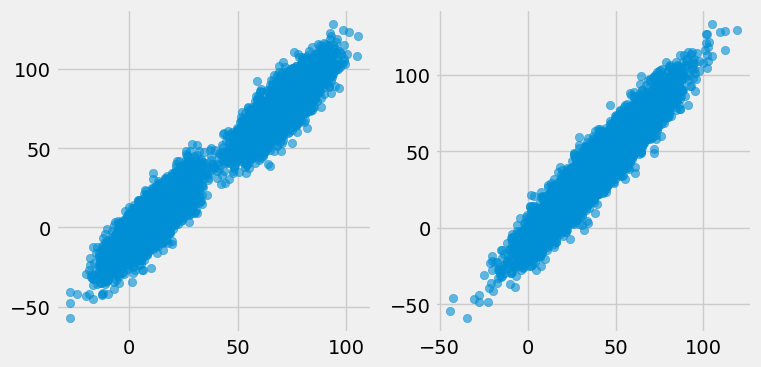

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X_bimodal, observed_y(X_bimodal), alpha=0.6)
ax[1].scatter(X1, observed_y(X1), alpha=0.6)

r-squared: 0.9000263848768906
62
r-squared: 0.9563538490203582
47


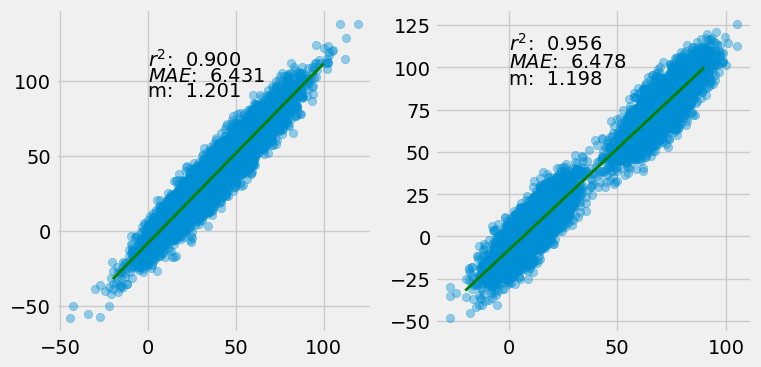

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
N = 100

X1 = X_norm
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
#-------------------------------------------------------------
y = observed_y(X1)
model.fit(X1[:, np.newaxis], y)
xfit = np.linspace(-20, 100, 1000)
yfit = model.predict(xfit[:, np.newaxis])
ypred = model.predict(X1.reshape(-1, 1))
print('r-squared:', r2_score(y, ypred))
ax[0].scatter(X1, y, alpha=0.4)
ax[0].plot(xfit, yfit, c='green', lw=2)
ax[0].text(0, 110, '$r^2$: %6.3f'%r2_score(y, ypred))
ax[0].text(0, 100, '$MAE$: %6.3f'%mean_absolute_error(y, ypred))
ax[0].text(0, 90, 'm: %6.3f'%model.coef_[0])
ind_pred_normal = np.argpartition(ypred, -N)[-N:]
ind_true_normal = np.argpartition(y, -N)[-N:]
common_normal = set(ind_pred_normal) & set(ind_true_normal)
print(len(common_normal))
#-------------------------------------------------------------
y = observed_y(X_bimodal)
model.fit(X_bimodal[:, np.newaxis], y)
xfit = np.linspace(-20, 90, 1000)
yfit = model.predict(xfit[:, np.newaxis])
ypred = model.predict(X_bimodal.reshape(-1, 1))
print('r-squared:', r2_score(y, ypred))
ax[1].scatter(X_bimodal, y, alpha=0.4)
ax[1].plot(xfit, yfit, c='green', lw=2)
ax[1].text(0, 110, '$r^2$: %6.3f'%r2_score(y, ypred))
ax[1].text(0, 100, '$MAE$: %6.3f'%mean_absolute_error(y, ypred))
ax[1].text(0, 90, 'm: %6.3f'%model.coef_[0])
ind_pred_bimodal = np.argpartition(ypred, -N)[-N:]
ind_true_bimodal = np.argpartition(y, -N)[-N:]
common_bimodal = set(ind_pred_bimodal) & set(ind_true_bimodal)
print(len(common_bimodal))

r-squared: 0.9040426711291266
65
r-squared: 0.697382056334134
46


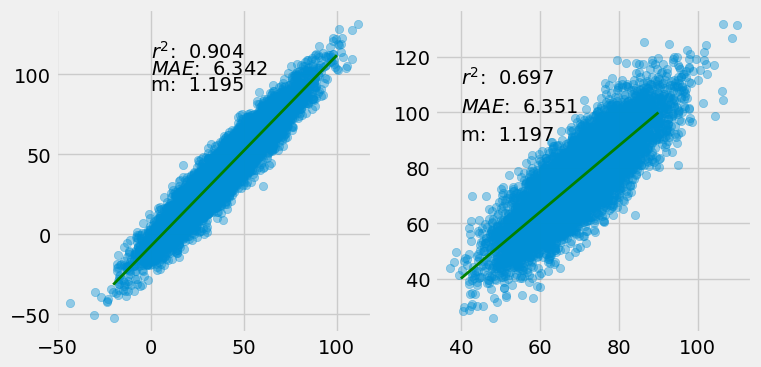

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
N = 100

X1 = X_norm
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
#-------------------------------------------------------------
y = observed_y(X1)
model.fit(X1[:, np.newaxis], y)
xfit = np.linspace(-20, 100, 1000)
yfit = model.predict(xfit[:, np.newaxis])
ypred = model.predict(X1.reshape(-1, 1))
print('r-squared:', r2_score(y, ypred))
ax[0].scatter(X1, y, alpha=0.4)
ax[0].plot(xfit, yfit, c='green', lw=2)
ax[0].text(0, 110, '$r^2$: %6.3f'%r2_score(y, ypred))
ax[0].text(0, 100, '$MAE$: %6.3f'%mean_absolute_error(y, ypred))
ax[0].text(0, 90, 'm: %6.3f'%model.coef_[0])
ind_pred_normal = np.argpartition(ypred, -N)[-N:]
ind_true_normal = np.argpartition(y, -N)[-N:]
common_normal = set(ind_pred_normal) & set(ind_true_normal)
print(len(common_normal))
#-------------------------------------------------------------
y = observed_y(X3)
model.fit(X3[:, np.newaxis], y)
xfit = np.linspace(40, 90, 1000)
yfit = model.predict(xfit[:, np.newaxis])
ypred = model.predict(X3.reshape(-1, 1))
print('r-squared:', r2_score(y, ypred))
ax[1].scatter(X3, y, alpha=0.4)
ax[1].plot(xfit, yfit, c='green', lw=2)
ax[1].text(40, 110, '$r^2$: %6.3f'%r2_score(y, ypred))
ax[1].text(40, 100, '$MAE$: %6.3f'%mean_absolute_error(y, ypred))
ax[1].text(40, 90, 'm: %6.3f'%model.coef_[0])
ind_pred_bimodal = np.argpartition(ypred, -N)[-N:]
ind_true_bimodal = np.argpartition(y, -N)[-N:]
common_bimodal = set(ind_pred_bimodal) & set(ind_true_bimodal)
print(len(common_bimodal))

Get the largest N y values as predicted and from the true data

In [9]:
def calc_stats(X, y, N):
    y = observed_y(X)
    model.fit(X[:, np.newaxis], y)
    xfit = np.linspace(-20, 90, 1000)
    yfit = model.predict(xfit[:, np.newaxis])
    ypred = model.predict(X.reshape(-1, 1))
    r2 = r2_score(y, ypred)
    mae = mean_absolute_error(y, ypred)
    ind_pred = np.argpartition(ypred, -N)[-N:]
    ind_true = np.argpartition(y, -N)[-N:]
    common = set(ind_pred) & set(ind_true)
    precision = len(common)/N
    return np.array([r2, mae, precision])

In [10]:
running_stats_bimodal = []
for i in np.arange(10, 200, 10):
    stats= []
    for f in range(10):
        stats.append(calc_stats(X_bimodal, y, i))
    stats = np.array(stats)
    running_stats_bimodal.append([i, np.mean(stats[:, 0]), np.mean(stats[:, 1]), np.mean(stats[:, 2])])

In [25]:
running_stats_norm = []
for i in np.arange(10, 200, 10):
    stats= []
    for f in range(10):
        stats.append(calc_stats(X_norm, y, i))
    stats = np.array(stats)
    running_stats_norm.append([i, np.mean(stats[:, 0]), np.mean(stats[:, 1]), np.mean(stats[:, 2])])

In [26]:
running_stats_narrow = []
for i in np.arange(10, 200, 10):
    stats= []
    for f in range(10):
        stats.append(calc_stats(X3, y, i))
    stats = np.array(stats)
    running_stats_narrow.append([i, np.mean(stats[:, 0]), np.mean(stats[:, 1]), np.mean(stats[:, 2])])

In [29]:
running_stats_bimodal = np.array(running_stats_bimodal)
running_stats_norm = np.array(running_stats_norm)
running_stats_narrow = np.array(running_stats_narrow)

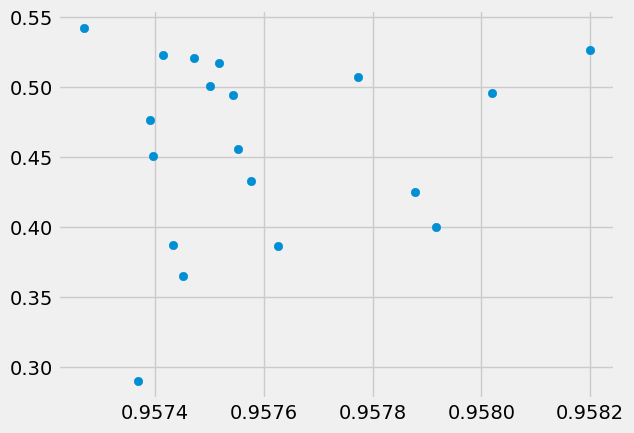

In [30]:
plt.scatter(running_stats_bimodal[:, 1], running_stats_bimodal[:, 3])

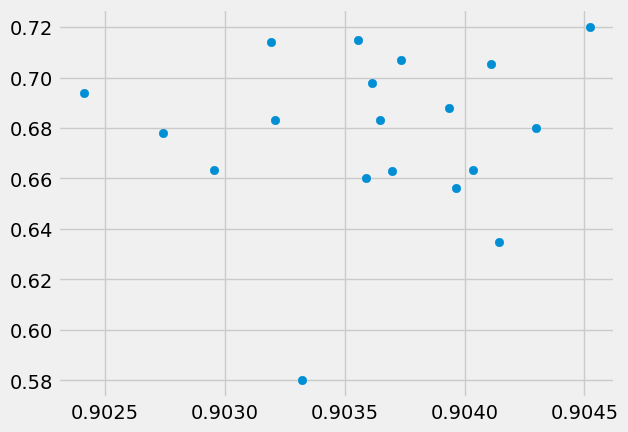

In [31]:
plt.scatter(running_stats_norm[:, 1], running_stats_norm[:, 3])

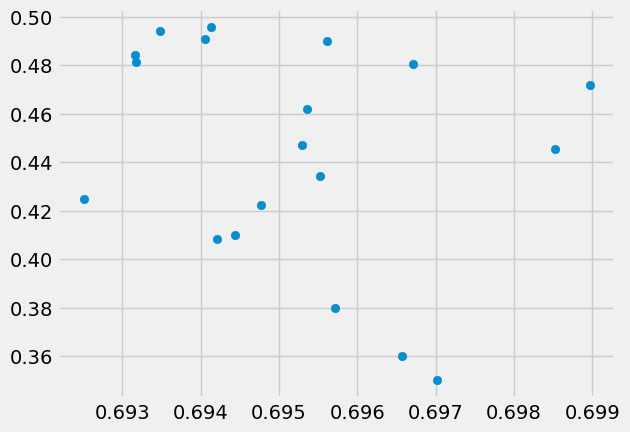

In [32]:
plt.scatter(running_stats_narrow[:, 1], running_stats_narrow[:, 3])